## Import library

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Read data

In [58]:
df = pd.read_csv("BBC_News_Summary_with_filename.csv")
df.head()

,Unnamed: 0,articles,summaries,categories,articles_file,summaries_file
0,0,Ad sales boost Time Warner profit\r\n\r\nQuart...,TimeWarner said fourth quarter sales rose 2% t...,business,001.txt,001.txt
1,1,Dollar gains on Greenspan speech\r\n\r\nThe do...,The dollar has hit its highest level against t...,business,002.txt,002.txt
2,2,Yukos unit buyer faces loan claim\r\n\r\nThe o...,Yukos' owner Menatep Group says it will ask Ro...,business,003.txt,003.txt
3,3,High fuel prices hit BA's profits\r\n\r\nBriti...,"Rod Eddington, BA's chief executive, said the ...",business,004.txt,004.txt
4,4,Pernod takeover talk lifts Domecq\r\n\r\nShare...,Pernod has reduced the debt it took on to fund...,business,005.txt,005.txt


## Remove '\r\n'

In [59]:
df = df.replace(r'\r\n\r\n',' ', regex=True)
df.head()

,Unnamed: 0,articles,summaries,categories,articles_file,summaries_file
0,0,Ad sales boost Time Warner profit Quarterly pr...,TimeWarner said fourth quarter sales rose 2% t...,business,001.txt,001.txt
1,1,Dollar gains on Greenspan speech The dollar ha...,The dollar has hit its highest level against t...,business,002.txt,002.txt
2,2,Yukos unit buyer faces loan claim The owners o...,Yukos' owner Menatep Group says it will ask Ro...,business,003.txt,003.txt
3,3,High fuel prices hit BA's profits British Airw...,"Rod Eddington, BA's chief executive, said the ...",business,004.txt,004.txt
4,4,Pernod takeover talk lifts Domecq Shares in UK...,Pernod has reduced the debt it took on to fund...,business,005.txt,005.txt


# Visuallize data

In [60]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

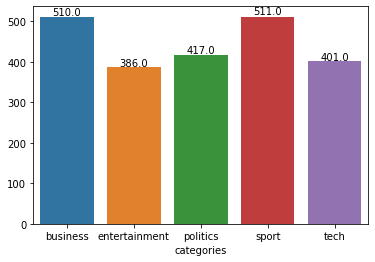

In [61]:
plt.figure(figsize=(6,4))

category_sizes = df.groupby('categories').size()
ax = sns.barplot(x=category_sizes.index, y= category_sizes)
show_values(ax)

min_val = category_sizes.min()
# plt.axhline(y=min_val,color='red',ls='--', lw=1)
# plt.axhline(y=int(min_val*0.8),color='blue',ls='--', lw=1)
plt.show()

In [62]:
#-- get length of each article and summary for analysis
df['articles_length'] = df['articles'].apply(lambda x : len(x.split()))
df['summaries_length'] = df['summaries'].apply(lambda x : len(x.split()))

In [63]:
df.head()

,Unnamed: 0,articles,summaries,categories,articles_file,summaries_file,articles_length,summaries_length
0,0,Ad sales boost Time Warner profit Quarterly pr...,TimeWarner said fourth quarter sales rose 2% t...,business,001.txt,001.txt,421,134
1,1,Dollar gains on Greenspan speech The dollar ha...,The dollar has hit its highest level against t...,business,002.txt,002.txt,384,158
2,2,Yukos unit buyer faces loan claim The owners o...,Yukos' owner Menatep Group says it will ask Ro...,business,003.txt,003.txt,264,121
3,3,High fuel prices hit BA's profits British Airw...,"Rod Eddington, BA's chief executive, said the ...",business,004.txt,004.txt,406,197
4,4,Pernod takeover talk lifts Domecq Shares in UK...,Pernod has reduced the debt it took on to fund...,business,005.txt,005.txt,265,106


In [64]:
category_length = df.groupby('categories',0).agg(
    {'articles_length':['mean', 'max'],'summaries_length':['mean', 'max']})
print(type(category_length))
category_length

<class 'pandas.core.frame.DataFrame'>


articles_length       summaries_length      
                         mean   max             mean   max
categories                                                
business           328.880392   891       139.929412   403
entertainment      330.621762  3482       144.049223  1706
politics           453.973621  4432       195.709832  2073
sport              329.262231  1662       143.187867   659
tech               502.695761  2969       213.837905  1430

<AxesSubplot:xlabel='categories', ylabel='summaries_length'>

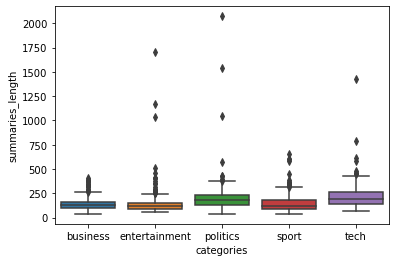

In [65]:
sns.boxplot(x="categories", y="summaries_length", data=df)

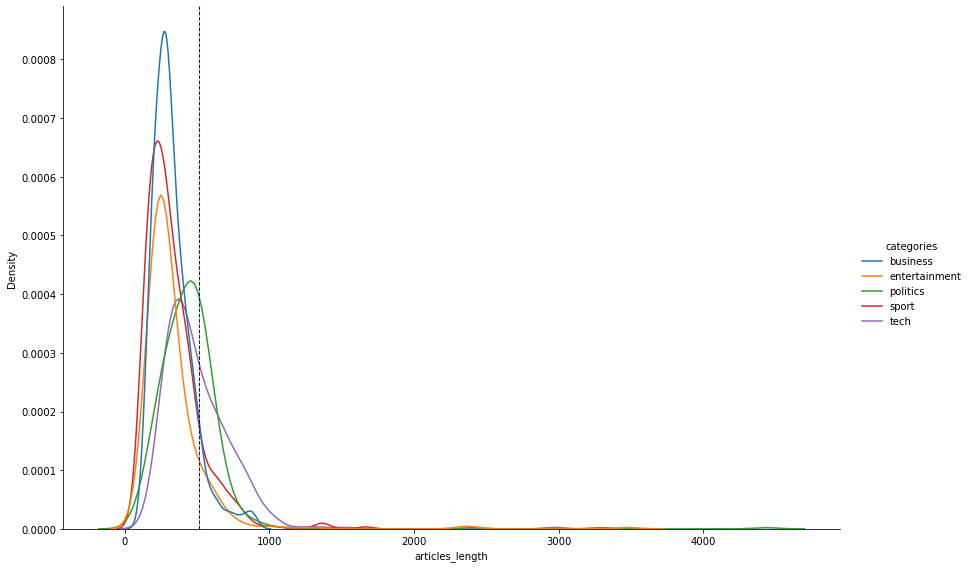

In [66]:
sns.displot(
    data = df, 
    x = 'articles_length', 
    kind = "kde", 
    color = 'darkblue', 
    hue = "categories",
    height = 8,
    aspect = 1.5
    )

plt.axvline(x=512,
            color='blue',
            ls='--', 
            lw=1)

## Filter data (Remove word len > 512)

In [67]:
df_filter = df[df['articles_length']<=512]

In [68]:
category_length = df_filter.groupby('categories',0).agg(
    {'articles_length':['mean', 'max'],'summaries_length':['mean', 'max']})
print("Average articles length:", df_filter["articles_length"].mean())
print("Average summaries length:", df_filter["summaries_length"].mean())
category_length

Average articles length: 308.2282548476454
Average summaries length: 132.25761772853187


articles_length      summaries_length     
                         mean  max             mean  max
categories                                              
business           299.433761  505       127.465812  259
entertainment      275.052023  511       118.994220  254
politics           361.431973  512       154.469388  275
sport              277.400000  511       121.608889  261
tech               364.202429  511       152.878543  253

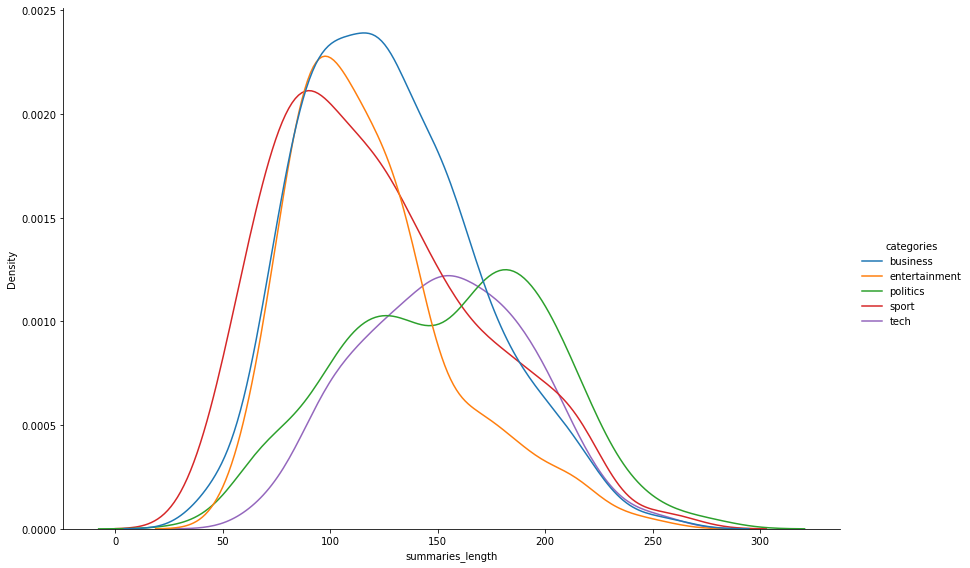

In [69]:
sns.displot(
    data = df_filter, 
    x = 'summaries_length', 
    kind = "kde", 
    color = 'darkblue', 
    hue = "categories",
    height = 8,
    aspect = 1.5
    )

For Fine tuning: 197
For Evaluating: 49


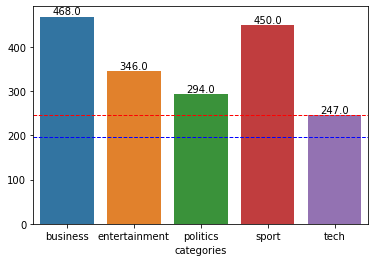

In [70]:
plt.figure(figsize=(6,4))

category_sizes = df_filter.groupby('categories').size()

ax = sns.barplot(x=category_sizes.index, y= category_sizes)
show_values(ax)

min_val = category_sizes.min()
print("For Fine tuning:", int(min_val*0.8))
print("For Evaluating:", int(min_val*0.2))
plt.axhline(y=min_val,color='red',ls='--', lw=1)
plt.axhline(y=int(min_val*0.8),color='blue',ls='--', lw=1)
plt.show()

<AxesSubplot:xlabel='categories', ylabel='summaries_length'>

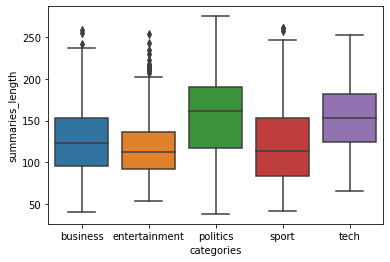

In [71]:
sns.boxplot(x="categories", y="summaries_length", data=df_filter)

In [72]:
df_filter.head()

,Unnamed: 0,articles,summaries,categories,articles_file,summaries_file,articles_length,summaries_length
0,0,Ad sales boost Time Warner profit Quarterly pr...,TimeWarner said fourth quarter sales rose 2% t...,business,001.txt,001.txt,421,134
1,1,Dollar gains on Greenspan speech The dollar ha...,The dollar has hit its highest level against t...,business,002.txt,002.txt,384,158
2,2,Yukos unit buyer faces loan claim The owners o...,Yukos' owner Menatep Group says it will ask Ro...,business,003.txt,003.txt,264,121
3,3,High fuel prices hit BA's profits British Airw...,"Rod Eddington, BA's chief executive, said the ...",business,004.txt,004.txt,406,197
4,4,Pernod takeover talk lifts Domecq Shares in UK...,Pernod has reduced the debt it took on to fund...,business,005.txt,005.txt,265,106


In [73]:
categories = np.unique(df.categories)
df_filter_finetune = pd.DataFrame()
df_filter_eval = pd.DataFrame()

np.random.seed(0)
use_size = category_sizes.min()
FINETUNE_RATIO = 0.8
fineture_size = round(FINETUNE_RATIO*use_size/5)*5

for cat in categories:
    df_cat = df_filter[df_filter.categories == cat]
    df_cat.sort_values(by=['summaries_length'], inplace=True)
    cut = int((len(df_cat)-use_size)/2)

    if cut > 0:
        df_cat = df_cat[cut:-cut-1]
    idx = np.arange(use_size)
    np.random.shuffle(idx)

    idx_train = idx[:fineture_size]
    idf_eval = idx[fineture_size:]

    df_filter_finetune = pd.concat([df_filter_finetune, df_cat.iloc[idx_train]])
    df_filter_eval = pd.concat([df_filter_eval, df_cat.iloc[idf_eval]])


C:\Users\THETANG\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


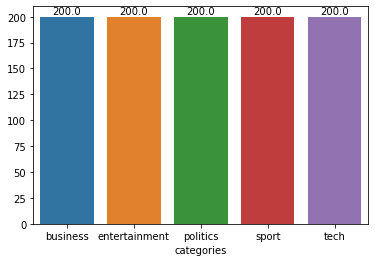

In [74]:
plt.figure(figsize=(6,4))

category_sizes = df_filter_finetune.groupby('categories').size()

ax = sns.barplot(x=category_sizes.index, y= category_sizes)
show_values(ax)

plt.show()

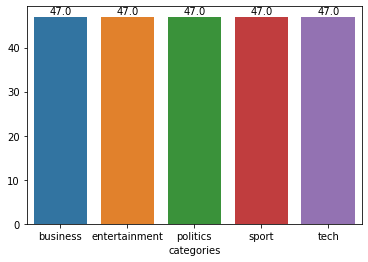

In [75]:
plt.figure(figsize=(6,4))

category_sizes = df_filter_eval.groupby('categories').size()

ax = sns.barplot(x=category_sizes.index, y= category_sizes)
show_values(ax)

plt.show()

<AxesSubplot:xlabel='categories', ylabel='summaries_length'>

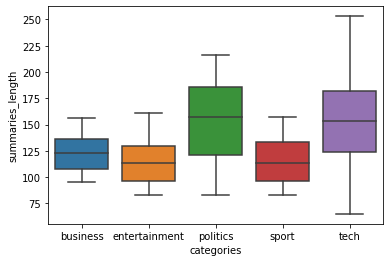

In [76]:
sns.boxplot(x="categories", y="summaries_length", data=df_filter_finetune)

In [77]:
category_length = df_filter_finetune.groupby('categories',0).agg(
    {'articles_length':['mean', 'max'],'summaries_length':['mean', 'max']})
print("Average articles length:", df_filter["articles_length"].mean())
print("Average summaries length:", df_filter["summaries_length"].mean())
category_length

Average articles length: 308.2282548476454
Average summaries length: 132.25761772853187


articles_length      summaries_length     
                         mean  max             mean  max
categories                                              
business              290.420  424          123.000  156
entertainment         263.810  403          113.590  161
politics              361.925  511          153.275  216
sport                 267.035  441          114.930  157
tech                  365.580  511          153.105  253

In [78]:
category_length = df_filter_eval.groupby('categories',0).agg(
    {'articles_length':['mean', 'max'],'summaries_length':['mean', 'max']})
print("Average articles length:", df_filter["articles_length"].mean())
print("Average summaries length:", df_filter["summaries_length"].mean())
category_length

Average articles length: 308.2282548476454
Average summaries length: 132.25761772853187


articles_length      summaries_length     
                         mean  max             mean  max
categories                                              
business           294.468085  388       125.936170  154
entertainment      262.425532  413       112.978723  159
politics           385.382979  503       160.574468  215
sport              263.574468  386       116.191489  156
tech               358.340426  511       151.914894  253

In [79]:
df_filter_eval.head()

,Unnamed: 0,articles,summaries,categories,articles_file,summaries_file,articles_length,summaries_length
307,307,French boss to leave EADS The French co-head o...,The company should now be able put this disput...,business,308.txt,308.txt,332,137
402,402,WorldCom bosses' $54m payout Ten former direct...,"""None of the 10 former directors was a direct ...",business,403.txt,403.txt,373,148
245,245,Ebbers 'aware' of WorldCom fraud Former WorldC...,Mr Sullivan is at the centre of the government...,business,246.txt,246.txt,388,151
489,489,Brazil jobless rate hits new low Brazil's unem...,Brazil's unemployment rate fell to its lowest ...,business,490.txt,490.txt,309,102
381,381,Ban on forced retirement under 65 Employers wi...,Trade and Industry Secretary Patricia Hewitt s...,business,382.txt,382.txt,297,132


In [80]:
df_filter_eval_ = df_filter_eval[["articles", "summaries", "categories"]]
df_filter_eval_.reset_index(inplace=True, drop=True)
# df_filter_eval_.to_csv('Dataset_Evaluate.csv')
df_filter_eval_

,articles,summaries,categories
0,French boss to leave EADS The French co-head o...,The company should now be able put this disput...,business
1,WorldCom bosses' $54m payout Ten former direct...,"""None of the 10 former directors was a direct ...",business
2,Ebbers 'aware' of WorldCom fraud Former WorldC...,Mr Sullivan is at the centre of the government...,business
3,Brazil jobless rate hits new low Brazil's unem...,Brazil's unemployment rate fell to its lowest ...,business
4,Ban on forced retirement under 65 Employers wi...,Trade and Industry Secretary Patricia Hewitt s...,business
...,...,...,...
230,Google launches TV search service The net sear...,The net search giant Google has launched a sea...,tech
231,New Year's texting breaks record A mobile phon...,The MDA predicts that 2005 could see more than...,tech
232,Google's toolbar sparks concern Search engine ...,If a user clicks the AutoLink feature in the G...,tech
233,Blog reading explodes in America Americans are...,"This was also true of the average blog reader,...",tech


In [81]:
df_filter_finetune_ = df_filter_finetune[["articles", "summaries", "categories"]]
df_filter_finetune_.reset_index(inplace=True, drop=True)
# df_filter_finetune_.to_csv('Dataset_Finetune.csv')
df_filter_finetune_

,articles,summaries,categories
0,Wal-Mart to pay $14m in gun suit The world's l...,"""Although Wal-Mart has suspended gun sales in ...",business
1,S Korean consumers spending again South Korea ...,The country's economy has suffered from an ove...,business
2,Orange colour clash set for court A row over t...,Orange claims the new low-cost mobile service ...,business
3,Survey confirms property slowdown Government f...,House prices were 11.8% higher on the year in ...,business
4,UK homes hit Â£3.3 trillion total The value of...,More than a third of the UK's private housing ...,business
...,...,...,...
995,Gangsters dominate gaming chart Video games on...,"However, Sony's PlayStation 2 was the top sell...",tech
996,Bush website blocked outside US Surfers outsid...,Since then people outside the US trying to bro...,tech
997,Warning over Windows Word files Writing a Micr...,Writing a Microsoft Word document can be a dan...,tech
998,PlayStation 3 chip to be unveiled Details of t...,"Sony, IBM and Toshiba, who have been working o...",tech


In [82]:
def add_mix(df, groupby, sampling_size):
    df_mix = df.groupby(groupby).apply(lambda x: x.sample(sampling_size)).reset_index(drop=True)
    df_mix = df_mix.sample(frac=1).reset_index(drop=True)
    df_mix[groupby] = "Mixed"
    df_added = pd.concat([df, df_mix]).reset_index(drop=True)
    return df_added

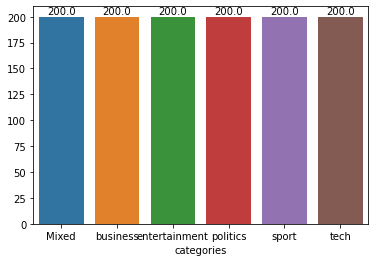

In [83]:
df_filter_finetune_mix = add_mix(df_filter_finetune_, 'categories', int(fineture_size/5))

plt.figure(figsize=(6,4))
category_sizes = df_filter_finetune_mix.groupby('categories').size()
ax = sns.barplot(x=category_sizes.index, y= category_sizes)
show_values(ax)
plt.show()

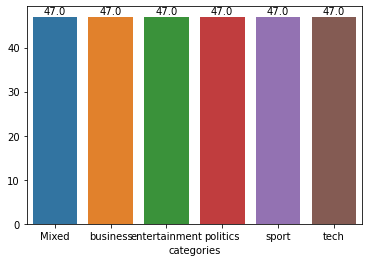

In [84]:
df_filter_eval_mix = add_mix(df_filter_eval_, 'categories', int((use_size-fineture_size)/5)+1)
df_filter_eval_mix = df_filter_eval_mix[:-3]

plt.figure(figsize=(6,4))
category_sizes = df_filter_eval_mix.groupby('categories').size()
ax = sns.barplot(x=category_sizes.index, y= category_sizes)
show_values(ax)
plt.show()

In [85]:
df_filter_finetune_mix

,articles,summaries,categories
0,Wal-Mart to pay $14m in gun suit The world's l...,"""Although Wal-Mart has suspended gun sales in ...",business
1,S Korean consumers spending again South Korea ...,The country's economy has suffered from an ove...,business
2,Orange colour clash set for court A row over t...,Orange claims the new low-cost mobile service ...,business
3,Survey confirms property slowdown Government f...,House prices were 11.8% higher on the year in ...,business
4,UK homes hit Â£3.3 trillion total The value of...,More than a third of the UK's private housing ...,business
...,...,...,...
1195,Xbox power cable 'fire fear' Microsoft has sai...,Microsoft has said it will replace more than 1...,Mixed
1196,Windows worm travels with Tetris Users are bei...,The Cellery worm installs a playable version o...,Mixed
1197,Thousands join strike in Wales Thousands of ci...,A range of services in Wales were affected as ...,Mixed
1198,Economy 'strong' in election year UK businesse...,The BDO optimism index - a leading indicator o...,Mixed


In [86]:
df_filter_eval_mix

,articles,summaries,categories
0,French boss to leave EADS The French co-head o...,The company should now be able put this disput...,business
1,WorldCom bosses' $54m payout Ten former direct...,"""None of the 10 former directors was a direct ...",business
2,Ebbers 'aware' of WorldCom fraud Former WorldC...,Mr Sullivan is at the centre of the government...,business
3,Brazil jobless rate hits new low Brazil's unem...,Brazil's unemployment rate fell to its lowest ...,business
4,Ban on forced retirement under 65 Employers wi...,Trade and Industry Secretary Patricia Hewitt s...,business
...,...,...,...
277,Blair to face MPs amid feud talk Tony Blair fa...,The new book claims Mr Prescott hosted a dinne...,Mixed
278,Holmes is hit by hamstring injury Kelly Holmes...,Kelly Holmes has been forced out of this weeke...,Mixed
279,Peugeot deal boosts Mitsubishi Struggling Japa...,Struggling Japanese car maker Mitsubishi Motor...,Mixed
280,'Standoff' on Deutsche's LSE bid Deutsche Boer...,Deutsche Boerse investors unhappy with its Lon...,Mixed


# Show tokenized lenght

In [87]:
model_params={
    "MODEL":"t5-base",             # model_type: t5-base/t5-large
    "SEED": 42                     # set seed for reproducibility 
}

In [88]:
# Importing the T5 modules 
from transformers import T5Tokenizer
tokenizer = T5Tokenizer.from_pretrained(model_params["MODEL"])

In [89]:
tokenizer = T5Tokenizer.from_pretrained('t5-base')
df_filter_finetune_mix['tokenized_sents'] = df_filter_finetune_mix.apply(lambda row: tokenizer(row['summaries']), axis=1)
df_filter_finetune_mix['tokenized_len'] = df_filter_finetune_mix.apply(lambda row: len(row['tokenized_sents']['input_ids']), axis=1)
df_filter_finetune_mix

,articles,summaries,categories,tokenized_sents,tokenized_len
0,Wal-Mart to pay $14m in gun suit The world's l...,"""Although Wal-Mart has suspended gun sales in ...",business,"[input_ids, attention_mask]",166
1,S Korean consumers spending again South Korea ...,The country's economy has suffered from an ove...,business,"[input_ids, attention_mask]",168
2,Orange colour clash set for court A row over t...,Orange claims the new low-cost mobile service ...,business,"[input_ids, attention_mask]",156
3,Survey confirms property slowdown Government f...,House prices were 11.8% higher on the year in ...,business,"[input_ids, attention_mask]",168
4,UK homes hit Â£3.3 trillion total The value of...,More than a third of the UK's private housing ...,business,"[input_ids, attention_mask]",152
...,...,...,...,...,...
1195,Xbox power cable 'fire fear' Microsoft has sai...,Microsoft has said it will replace more than 1...,Mixed,"[input_ids, attention_mask]",147
1196,Windows worm travels with Tetris Users are bei...,The Cellery worm installs a playable version o...,Mixed,"[input_ids, attention_mask]",145
1197,Thousands join strike in Wales Thousands of ci...,A range of services in Wales were affected as ...,Mixed,"[input_ids, attention_mask]",290
1198,Economy 'strong' in election year UK businesse...,The BDO optimism index - a leading indicator o...,Mixed,"[input_ids, attention_mask]",177


In [90]:
category_length = df_filter_finetune_mix.groupby('categories',0).agg(
    {'tokenized_len':['mean', 'max']})
category_length

tokenized_len     
                       mean  max
categories                      
Mixed               189.460  314
business            180.870  276
entertainment       170.855  251
politics            216.520  323
sport               172.270  314
tech                211.275  342

In [91]:
tokenizer = T5Tokenizer.from_pretrained('t5-base')
df_filter_eval_mix['tokenized_sents'] = df_filter_eval_mix.apply(lambda row: tokenizer(row['summaries']), axis=1)
df_filter_eval_mix['tokenized_len'] = df_filter_eval_mix.apply(lambda row: len(row['tokenized_sents']['input_ids']), axis=1)
df_filter_eval_mix

,articles,summaries,categories,tokenized_sents,tokenized_len
0,French boss to leave EADS The French co-head o...,The company should now be able put this disput...,business,"[input_ids, attention_mask]",209
1,WorldCom bosses' $54m payout Ten former direct...,"""None of the 10 former directors was a direct ...",business,"[input_ids, attention_mask]",226
2,Ebbers 'aware' of WorldCom fraud Former WorldC...,Mr Sullivan is at the centre of the government...,business,"[input_ids, attention_mask]",246
3,Brazil jobless rate hits new low Brazil's unem...,Brazil's unemployment rate fell to its lowest ...,business,"[input_ids, attention_mask]",153
4,Ban on forced retirement under 65 Employers wi...,Trade and Industry Secretary Patricia Hewitt s...,business,"[input_ids, attention_mask]",187
...,...,...,...,...,...
277,Blair to face MPs amid feud talk Tony Blair fa...,The new book claims Mr Prescott hosted a dinne...,Mixed,"[input_ids, attention_mask]",274
278,Holmes is hit by hamstring injury Kelly Holmes...,Kelly Holmes has been forced out of this weeke...,Mixed,"[input_ids, attention_mask]",149
279,Peugeot deal boosts Mitsubishi Struggling Japa...,Struggling Japanese car maker Mitsubishi Motor...,Mixed,"[input_ids, attention_mask]",170
280,'Standoff' on Deutsche's LSE bid Deutsche Boer...,Deutsche Boerse investors unhappy with its Lon...,Mixed,"[input_ids, attention_mask]",178


In [92]:
category_length = df_filter_eval_mix.groupby('categories',0).agg(
    {'tokenized_len':['mean', 'max']})
category_length

tokenized_len     
                       mean  max
categories                      
Mixed            192.659574  308
business         185.617021  246
entertainment    168.000000  248
politics         226.382979  316
sport            172.702128  312
tech             211.382979  342

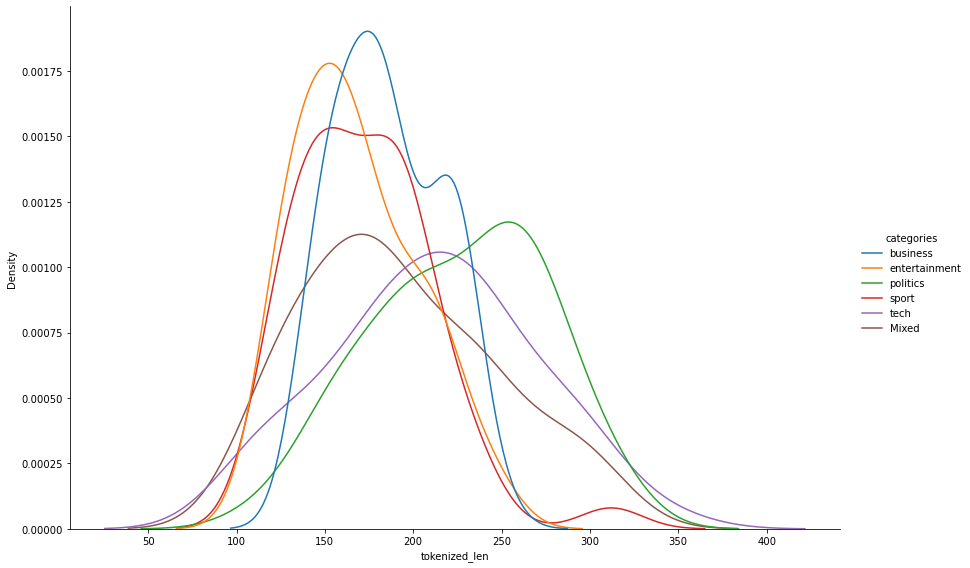

In [93]:
sns.displot(
    data = df_filter_eval_mix, 
    x = 'tokenized_len', 
    kind = "kde", 
    color = 'darkblue', 
    hue = "categories",
    height = 8,
    aspect = 1.5
    )